# Differential equations

In [14]:
import numpy as np
import matplotlib.pyplot as plt

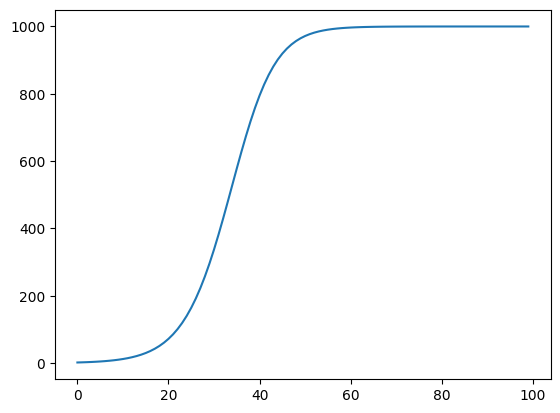

In [31]:
# Define values
a = 2
k = 1000
x0 = 2
h = 0.1

def x_dot(x):
    return a*(1 - (x/k))*x

x = x0

for _ in range(1000):
    
    x += x_dot(x)

x_values = np.arange(0, 10, h)
x_values[0] = x0

for i in range(1, len(x_values)):
    
    x_values[i] = x_values[i - 1] + h*x_dot(x_values[i - 1])

plt.plot(x_values)

## Task 2
> **Find the** trajectories of the Lotka-Volterra model.

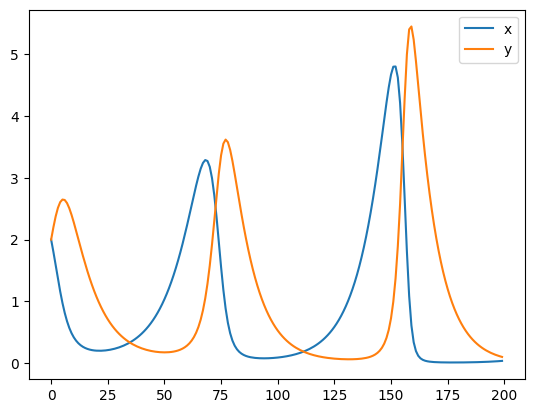

In [60]:
a = b = c = d = 1
h = 0.1
N = int(20 / h)  # Number of points

x = np.zeros(N)
y = np.zeros(N)
x[0] = 2
y[0] = 2

for n in range(1, N):
    x[n] = x[n-1] + h * (a*x[n-1] - b*x[n-1]*y[n-1])
    y[n] = y[n-1] + h * (-c*y[n-1] + d*x[n-1]*y[n-1])

plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()
plt.show()

Text(0, 0.5, 'Predator Population (y)')

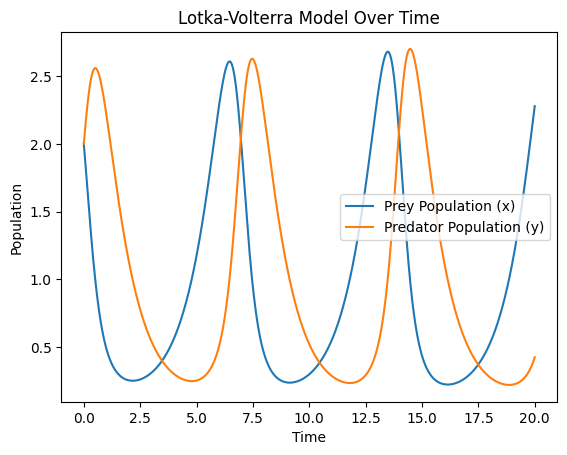

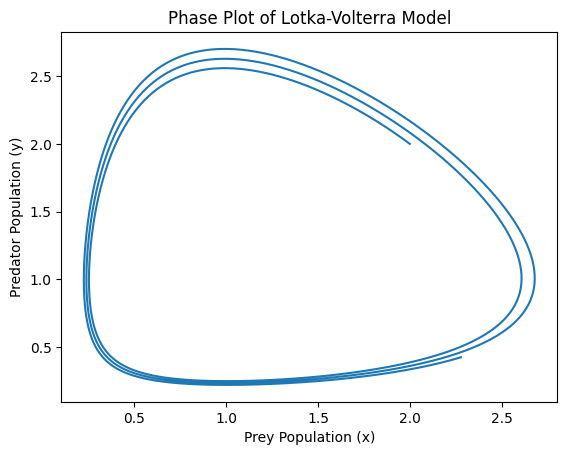

In [58]:
# Defining constants and initial conditions
T = 20
N = 2000
h = T/N
t = np.linspace(0, T, N+1)
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 2
y[0] = 2

# Euler's method for Lotka-Volterra equations
for n in range(N):
    x[n+1] = x[n] + h * x[n] * (1 - y[n])
    y[n+1] = y[n] + h * y[n] * (x[n] - 1)

# Plotting the results
plt.plot(t, x, label='Prey Population (x)')
plt.plot(t, y, label='Predator Population (y)')
plt.title('Lotka-Volterra Model Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.figure()

plt.plot(x, y)
plt.title('Phase Plot of Lotka-Volterra Model')
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')

## Task 11

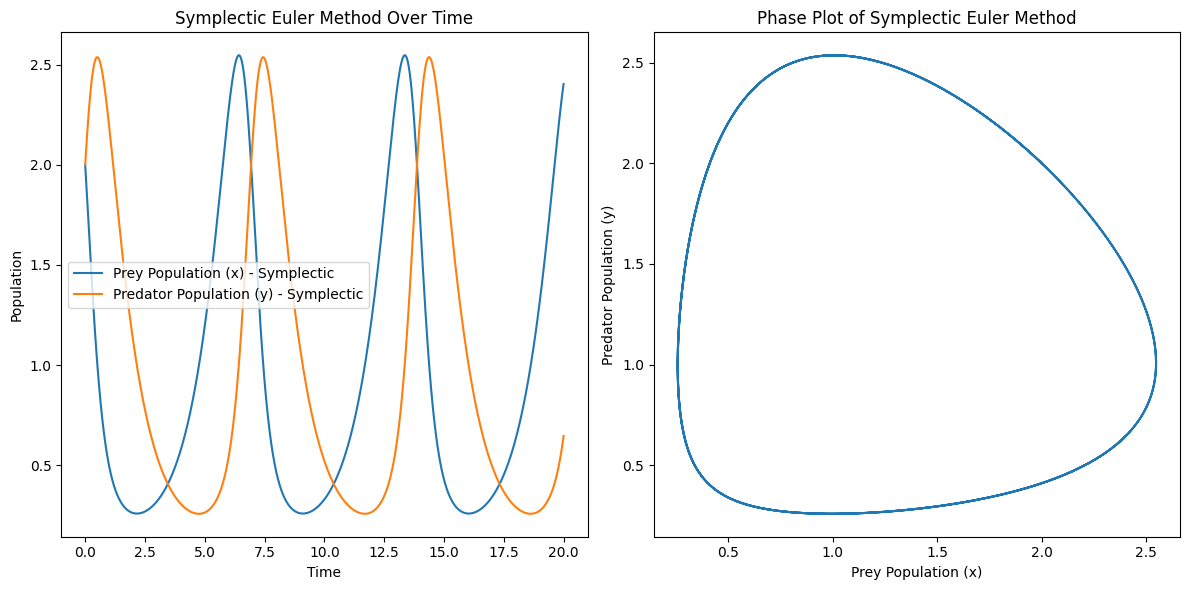

In [63]:
# Symplectic Euler Method for Lotka-Volterra Model

# Initialize arrays for symplectic Euler
x_symp = np.zeros(N+1)
y_symp = np.zeros(N+1)
x_symp[0] = 2  # Initial conditions
y_symp[0] = 2

# Symplectic Euler update
for n in range(N):
    x_symp[n+1] = x_symp[n] + h * x_symp[n] * (1 - y_symp[n])
    y_symp[n+1] = y_symp[n] + h * y_symp[n] * (x_symp[n+1] - 1)  # Notice x[n+1] used here

# Plotting the symplectic Euler results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x_symp, label='Prey Population (x) - Symplectic')
plt.plot(t, y_symp, label='Predator Population (y) - Symplectic')
plt.title('Symplectic Euler Method Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_symp, y_symp)
plt.title('Phase Plot of Symplectic Euler Method')
plt.xlabel('Prey Population (x)')
plt.ylabel('Predator Population (y)')

plt.tight_layout()
plt.show()


## Task 12

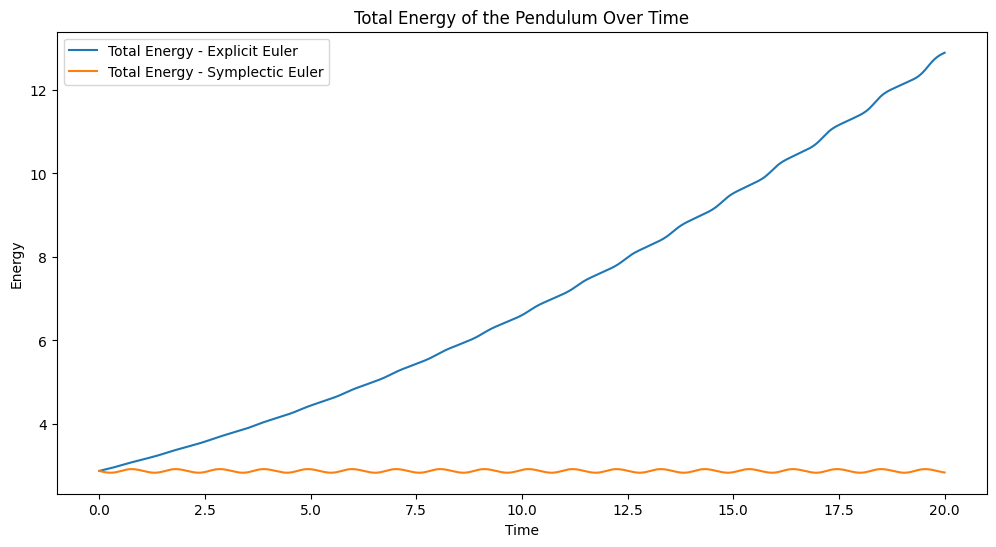

In [70]:
# Constants for the pendulum
g = 9.81  # gravitational acceleration
l = 1     # length of the pendulum
N = 2000  # number of steps
T = 20    # total time
h = T/N   # step size

# Initial conditions
theta_0 = np.pi / 4  # initial angle
omega_0 = 0          # initial angular velocity

# Arrays for explicit Euler
theta_exp = np.zeros(N+1)
omega_exp = np.zeros(N+1)
theta_exp[0] = theta_0
omega_exp[0] = omega_0

# Arrays for symplectic Euler
theta_symp = np.zeros(N+1)
omega_symp = np.zeros(N+1)
theta_symp[0] = theta_0
omega_symp[0] = omega_0

# Time array
t = np.linspace(0, T, N+1)

# Explicit Euler update
for n in range(N):
    theta_exp[n+1] = theta_exp[n] + h * omega_exp[n]
    omega_exp[n+1] = omega_exp[n] - h * (g/l) * np.sin(theta_exp[n])

# Symplectic Euler update
for n in range(N):
    omega_symp[n+1] = omega_symp[n] - h * (g/l) * np.sin(theta_symp[n])
    theta_symp[n+1] = theta_symp[n] + h * omega_symp[n+1]  # Notice omega[n+1] used here

# Calculate total energy for both methods
E_exp = 0.5 * l**2 * omega_exp**2 + g * l * (1 - np.cos(theta_exp))
E_symp = 0.5 * l**2 * omega_symp**2 + g * l * (1 - np.cos(theta_symp))

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting the energy over time for both methods
plt.plot(t, E_exp, label='Total Energy - Explicit Euler')
plt.plot(t, E_symp, label='Total Energy - Symplectic Euler')
plt.title('Total Energy of the Pendulum Over Time')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()

plt.show()


## Task 13
Van der Pol oscillator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


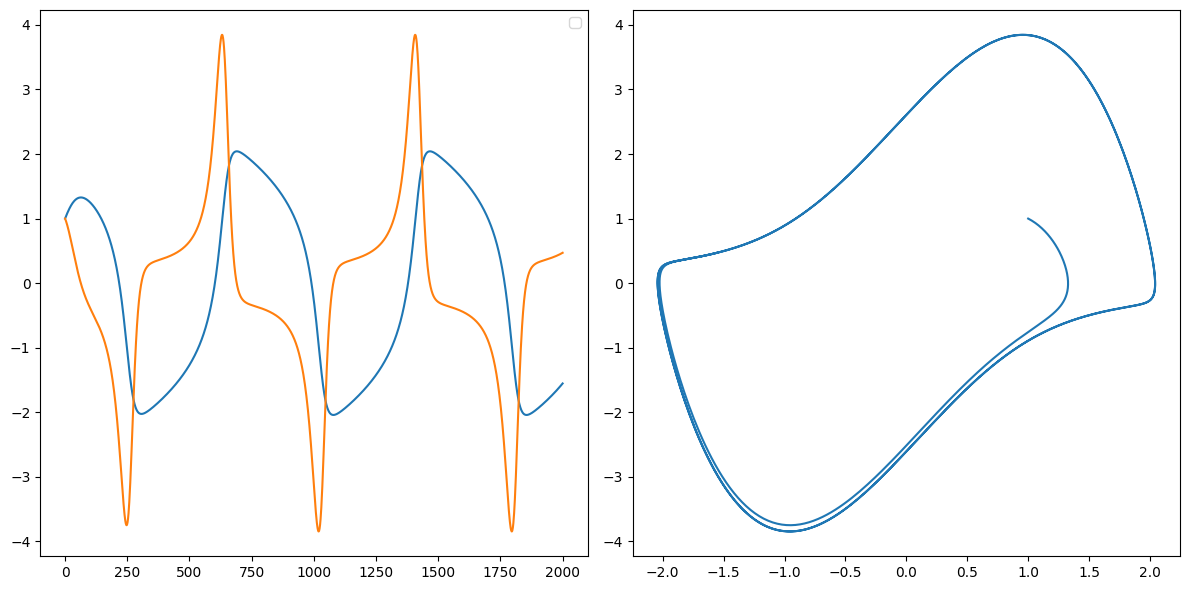

In [77]:
T = 20
N = 2000
h = T / N
mu = 2

x1 = np.zeros(N + 1)
x2 = np.zeros(N + 1)
x1[0] = 1
x2[0] = 1

for n in range(N):
    x1[n+1] = x1[n] + h * x2[n]
    x2[n+1] = x2[n] + h * (-mu * (x1[n]**2 - 1) * x2[n] - x1[n])
    
    
# Plotting the symplectic Euler results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x1)
plt.plot(x2)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x1, x2)

plt.tight_layout()
plt.show()